In [1]:
import os
import time 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error,mean_absolute_error, f1_score
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import ExtraTreesRegressor as etr
from sklearn.linear_model import BayesianRidge as br
from sklearn.ensemble import GradientBoostingRegressor as gbr
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression as lr
from sklearn.linear_model import ElasticNet as en
from sklearn.kernel_ridge import KernelRidge as kr
from sklearn.model_selection import  KFold, StratifiedKFold,GroupKFold, RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from datetime import datetime
from sklearn import preprocessing
import logging
import warnings

warnings.filterwarnings('ignore') #消除warning

In [3]:
train = pd.read_csv("../data/train.csv", parse_dates=['survey_time'],encoding='latin-1') 
test = pd.read_csv("../data/test.csv", parse_dates=['survey_time'],encoding='latin-1') #latin-1向下兼容ASCII
train = train[train["happiness"]!=-8].reset_index(drop=True)
train_data_copy = train.copy() #删去"happiness" 为-8的行
target_col = "happiness" #目标列
target = train_data_copy[target_col]
del train_data_copy[target_col] #去除目标列

data = pd.concat([train_data_copy,test],axis=0,ignore_index=True)

In [4]:
train.happiness.describe() #数据的基本信息

count    7988.000000
mean        3.867927
std         0.818717
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: happiness, dtype: float64

In [7]:
train.columns.to_list()

['id',
 'happiness',
 'survey_type',
 'province',
 'city',
 'county',
 'survey_time',
 'gender',
 'birth',
 'nationality',
 'religion',
 'religion_freq',
 'edu',
 'edu_other',
 'edu_status',
 'edu_yr',
 'income',
 'political',
 'join_party',
 'floor_area',
 'property_0',
 'property_1',
 'property_2',
 'property_3',
 'property_4',
 'property_5',
 'property_6',
 'property_7',
 'property_8',
 'property_other',
 'height_cm',
 'weight_jin',
 'health',
 'health_problem',
 'depression',
 'hukou',
 'hukou_loc',
 'media_1',
 'media_2',
 'media_3',
 'media_4',
 'media_5',
 'media_6',
 'leisure_1',
 'leisure_2',
 'leisure_3',
 'leisure_4',
 'leisure_5',
 'leisure_6',
 'leisure_7',
 'leisure_8',
 'leisure_9',
 'leisure_10',
 'leisure_11',
 'leisure_12',
 'socialize',
 'relax',
 'learn',
 'social_neighbor',
 'social_friend',
 'socia_outing',
 'equity',
 'class',
 'class_10_before',
 'class_10_after',
 'class_14',
 'work_exper',
 'work_status',
 'work_yr',
 'work_type',
 'work_manage',
 'insur_1',
 

In [8]:
train.shape


(7988, 140)

In [9]:
ls ../data


happiness_test_abbr.csv      submit_example.csv
happiness_test_complete.csv  survey.pdf
happiness_train_abbr.csv     test.csv
index.xlsx                   train.csv
submision.csv


In [12]:
train = pd.read_csv('../data/happiness_train_abbr.csv',sep=',')

In [13]:
train

,id,happiness,survey_type,province,city,county,survey_time,gender,birth,nationality,...,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability
0,1,4,1,12,32,59,2015/8/4 14:18,1,1959,1,...,60000.0,2,2,1,2,3,3,2,4,3
1,2,4,2,18,52,85,2015/7/21 15:04,1,1992,1,...,40000.0,3,4,1,2,1,1,1,4,2
2,3,4,2,29,83,126,2015/7/21 13:24,2,1967,1,...,8000.0,3,3,1,2,3,2,1,4,2
3,4,5,2,10,28,51,2015/7/25 17:33,2,1943,1,...,12000.0,3,3,1,1,7,2,1,3,2
4,5,4,1,7,18,36,2015/8/10 9:50,2,1994,1,...,-2.0,4,3,1,1,1,3,2,3,-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7996,2,2,29,82,124,2015/7/21 19:36,1,1981,1,...,50000.0,1,3,0,1,3,1,2,2,3
7996,7997,3,1,12,32,61,2015/7/31 16:00,2,1945,1,...,19200.0,1,2,1,2,7,2,1,5,2
7997,7998,4,1,16,46,78,2015/8/1 17:48,2,1967,1,...,-2.0,3,2,1,2,3,3,1,4,-8
7998,7999,3,1,1,1,8,2015/9/22 18:52,2,1978,1,...,170000.0,1,3,-1,2,1,2,1,4,2


In [15]:
train.columns.to_list()

['id',
 'happiness',
 'survey_type',
 'province',
 'city',
 'county',
 'survey_time',
 'gender',
 'birth',
 'nationality',
 'religion',
 'religion_freq',
 'edu',
 'income',
 'political',
 'floor_area',
 'height_cm',
 'weight_jin',
 'health',
 'health_problem',
 'depression',
 'hukou',
 'socialize',
 'relax',
 'learn',
 'equity',
 'class',
 'work_exper',
 'work_status',
 'work_yr',
 'work_type',
 'work_manage',
 'family_income',
 'family_m',
 'family_status',
 'house',
 'car',
 'marital',
 'status_peer',
 'status_3_before',
 'view',
 'inc_ability']

In [155]:
categorical_features = [
    'survey_type','province','city','county',
    'gender','nationality','religion','political',
    'health','hukou','work_exper','work_status','work_type',
    'car','marital'   
]
ordered_feature = [
    'religion_freq','edu','health_problem','depression',
    'socialize','relax','learn','equity',
    'class','work_manage','family_status',
    'status_peer','status_3_before','view',
    'inc_ability' 
]
numeric_features = [
    'income','floor_area','height_cm','weight_jin',
    'work_yr','family_income','family_m','house'
]

In [151]:
numeric_features

['income',
 'floor_area',
 'height_cm',
 'weight_jin',
 'work_yr',
 'family_income',
 'family_m',
 'house']

In [17]:
time = ['survey_time','birth']

In [46]:
train['survey_time'] = train['survey_time'].apply(lambda s:datetime.strptime(s, "%Y/%m/%d %H:%M"))

<AxesSubplot:xlabel='birth', ylabel='Density'>

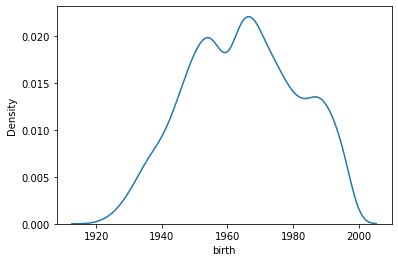

In [21]:
sns.kdeplot(data=train,x='birth')

<AxesSubplot:xlabel='birth', ylabel='happiness'>

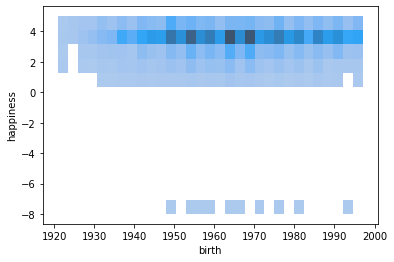

In [23]:
sns.histplot(data=train,x='birth',y='happiness')

In [48]:
# sumarize data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 42 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               8000 non-null   int64         
 1   happiness        8000 non-null   int64         
 2   survey_type      8000 non-null   int64         
 3   province         8000 non-null   int64         
 4   city             8000 non-null   int64         
 5   county           8000 non-null   int64         
 6   survey_time      8000 non-null   datetime64[ns]
 7   gender           8000 non-null   int64         
 8   birth            8000 non-null   int64         
 9   nationality      8000 non-null   int64         
 10  religion         8000 non-null   int64         
 11  religion_freq    8000 non-null   int64         
 12  edu              8000 non-null   int64         
 13  income           8000 non-null   int64         
 14  political        8000 non-null   int64  

<AxesSubplot:>

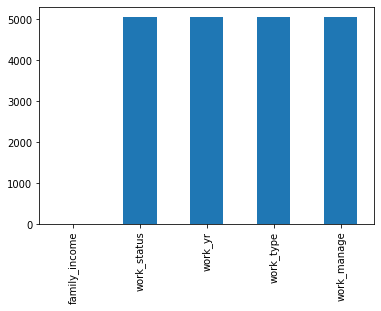

In [25]:
# nan可视化
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [29]:
import missingno as msno

<AxesSubplot:>

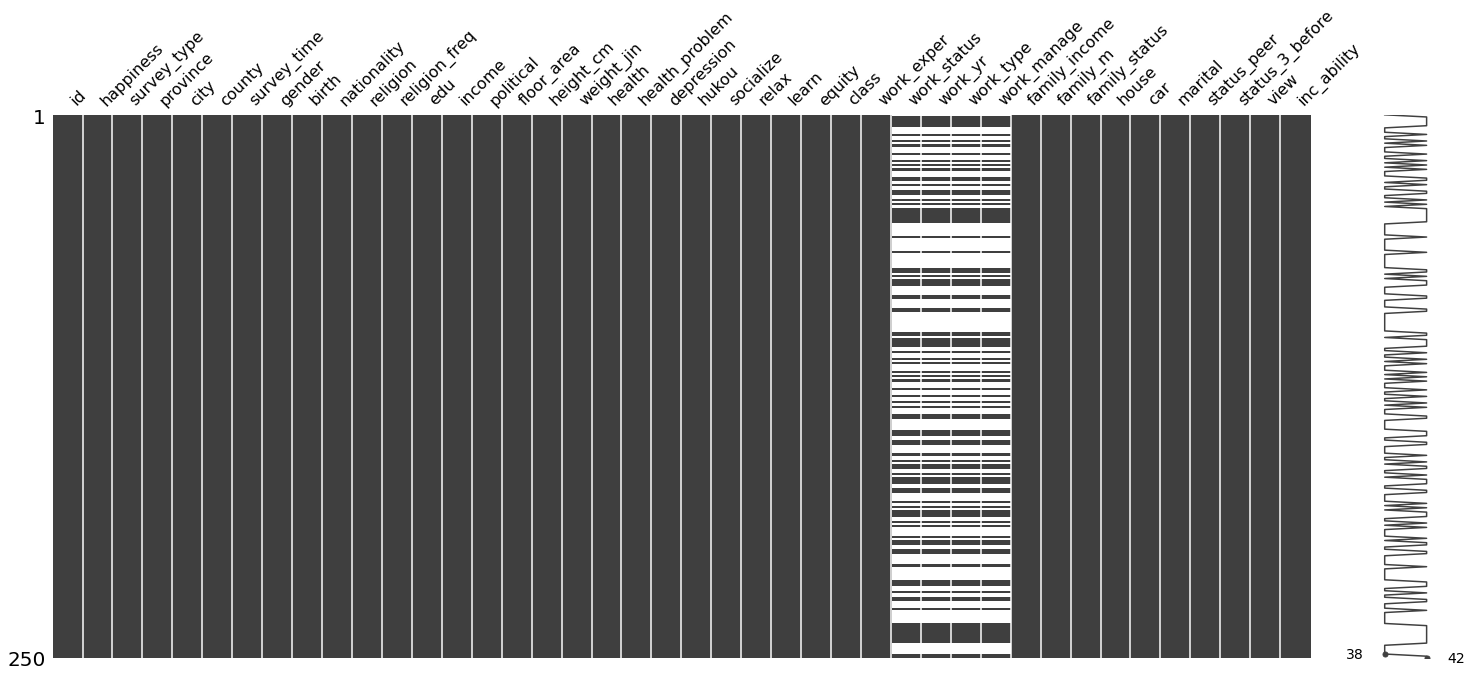

In [30]:
msno.matrix(train.sample(250))

In [139]:
missing_value_feature = ['work_status','work_yr','work_type','work_manege']

In [41]:
train['survey_time'][0]

'2015/8/4 14:18'

In [49]:
train.skew(), train.kurt()

(id                  0.000000
 happiness          -3.645304
 survey_type         0.385010
 province            0.139244
 city                0.067676
 county             -0.102218
 gender             -0.120239
 birth              -0.038405
 nationality         2.864619
 religion           -7.442795
 religion_freq       2.655575
 edu                 0.922246
 income             37.813468
 political          -1.447044
 floor_area          3.195369
 height_cm          -0.002480
 weight_jin          0.394998
 health             -1.139758
 health_problem     -3.676050
 depression         -3.068851
 hukou               1.500091
 socialize          -0.608181
 relax              -2.645644
 learn              -0.748080
 equity             -3.579100
 class              -2.109052
 work_exper          0.104763
 work_status        -1.059328
 work_yr             0.644487
 work_type          -5.828411
 work_manage        -4.756079
 family_income      25.891524
 family_m            4.453706
 family_st

In [56]:
train['income'].value_counts()

0          1199
20000       604
30000       586
10000       536
50000       362
           ... 
44000         1
3060          1
3100          1
9940000       1
8100          1
Name: income, Length: 330, dtype: int64

In [99]:
train['income_log'] = np.log10(train['income']+4)

In [118]:
train['income'].describe()

count    8.000000e+03
mean     3.330734e+04
std      2.329853e+05
min     -3.000000e+00
25%      1.695000e+03
50%      1.500000e+04
75%      3.600000e+04
max      9.999990e+06
Name: income, dtype: float64

<AxesSubplot:xlabel='income_log', ylabel='Density'>

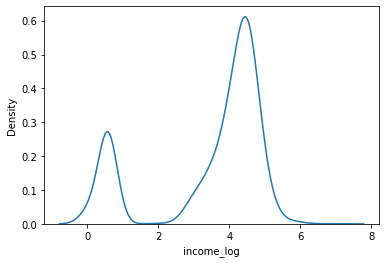

In [101]:
sns.kdeplot(data=train,x='income_log')
#plt.xlim(-1,200000)

In [119]:
train[train.income.between(-10,150000)]['income'].shape

(7879,)

In [70]:
0.25*10**6

250000.0

In [125]:
train[train.edu==13].shape

(79, 43)

In [124]:
85/8000

0.010625

<AxesSubplot:xlabel='happiness', ylabel='Density'>

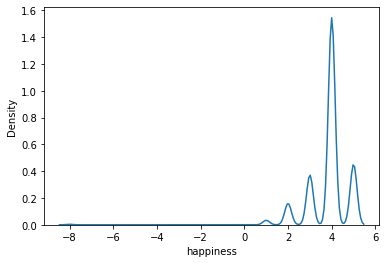

In [127]:
sns.kdeplot(data=train,x='happiness')

# 数字特征分析 

In [156]:
numeric_features.append('happiness')


In [157]:
numeric_features

['income',
 'floor_area',
 'height_cm',
 'weight_jin',
 'work_yr',
 'family_income',
 'family_m',
 'house',
 'happiness']

In [158]:
len(numeric_features)

9

In [160]:
numeric_features = [name for name in numeric_features  if name not in missing_value_feature ]

In [161]:
## 1) 相关性分析
price_numeric = train[numeric_features]
correlation = price_numeric.corr()
print(correlation['happiness'].sort_values(ascending = False),'\n')

happiness        1.000000
house            0.103013
weight_jin       0.074584
family_m         0.054821
family_income    0.047654
floor_area       0.046945
height_cm        0.030380
income           0.024056
Name: happiness, dtype: float64 



<AxesSubplot:title={'center':'Correlation of Numeric Features with Price'}>

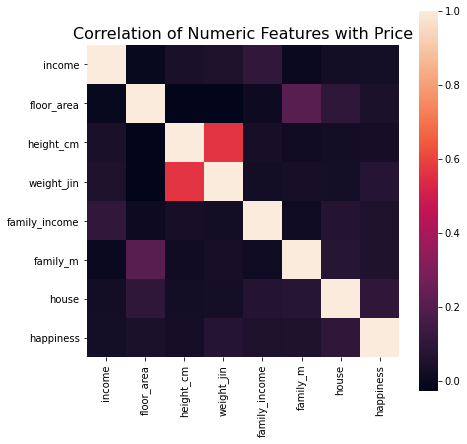

In [163]:
f , ax = plt.subplots(figsize = (7, 7))

plt.title('Correlation of Numeric Features with Price',y=1,size=16)


sns.heatmap(correlation,square = True,  vmax=1)

In [165]:
## 2) 查看几个特征的偏度和峰值
for col in numeric_features:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(train[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(train[col].kurt())  
         )

income          Skewness: 37.81     Kurtosis: 1547.69
floor_area      Skewness: 03.20     Kurtosis: 019.16
height_cm       Skewness: -0.00     Kurtosis: -00.01
weight_jin      Skewness: 00.39     Kurtosis: 000.75
family_income   Skewness: 25.89     Kurtosis: 778.84
family_m        Skewness: 04.45     Kurtosis: 115.83
house           Skewness: 06.71     Kurtosis: 247.21
happiness       Skewness: -3.65     Kurtosis: 037.75


In [169]:
del numeric_features[-1]

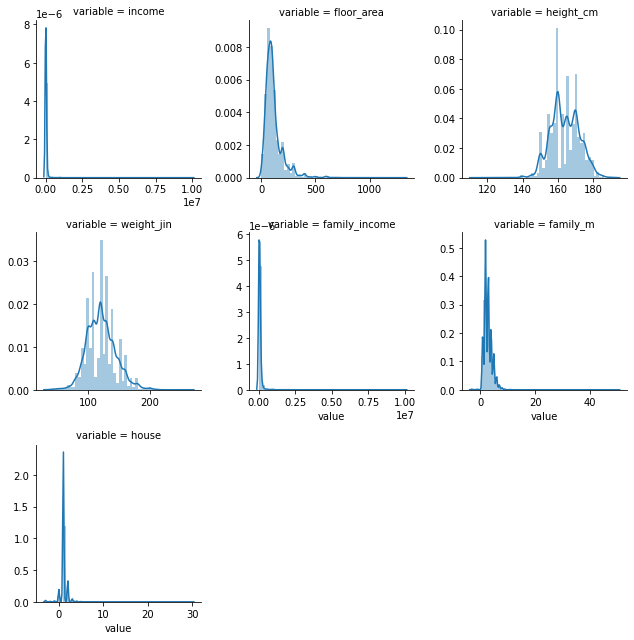

In [171]:
## 3) 每个数字特征得分布可视化
f = pd.melt(train, value_vars=numeric_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

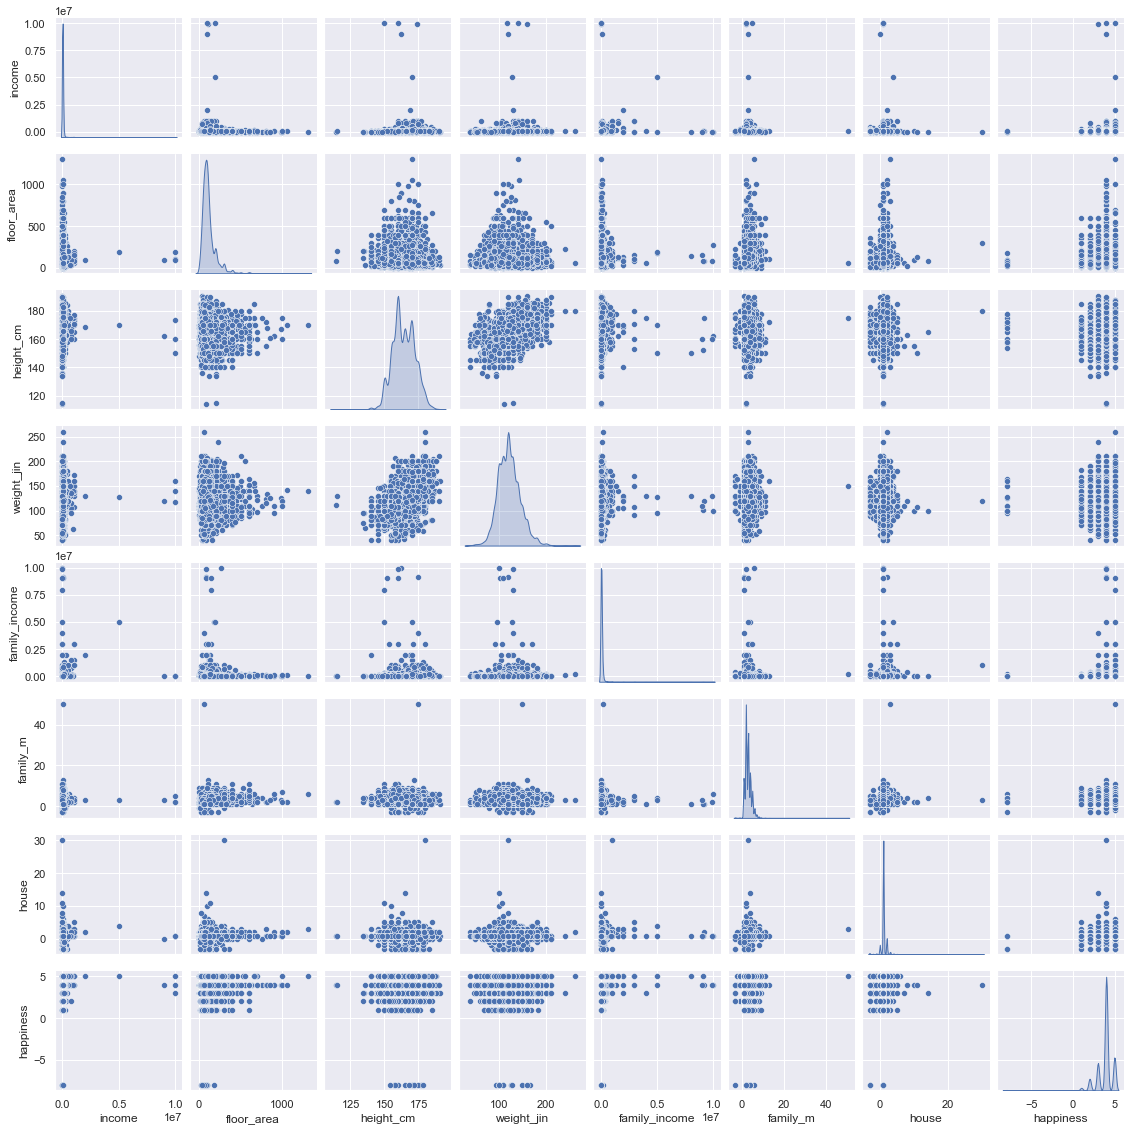

In [173]:
## 4) 数字特征相互之间的关系可视化
sns.set()
columns = numeric_features+['happiness']
sns.pairplot(train[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

In [192]:
categorical_features

['survey_type',
 'province',
 'city',
 'county',
 'gender',
 'nationality',
 'religion',
 'political',
 'health',
 'hukou',
 'work_exper',
 'work_status',
 'work_type',
 'car',
 'marital']

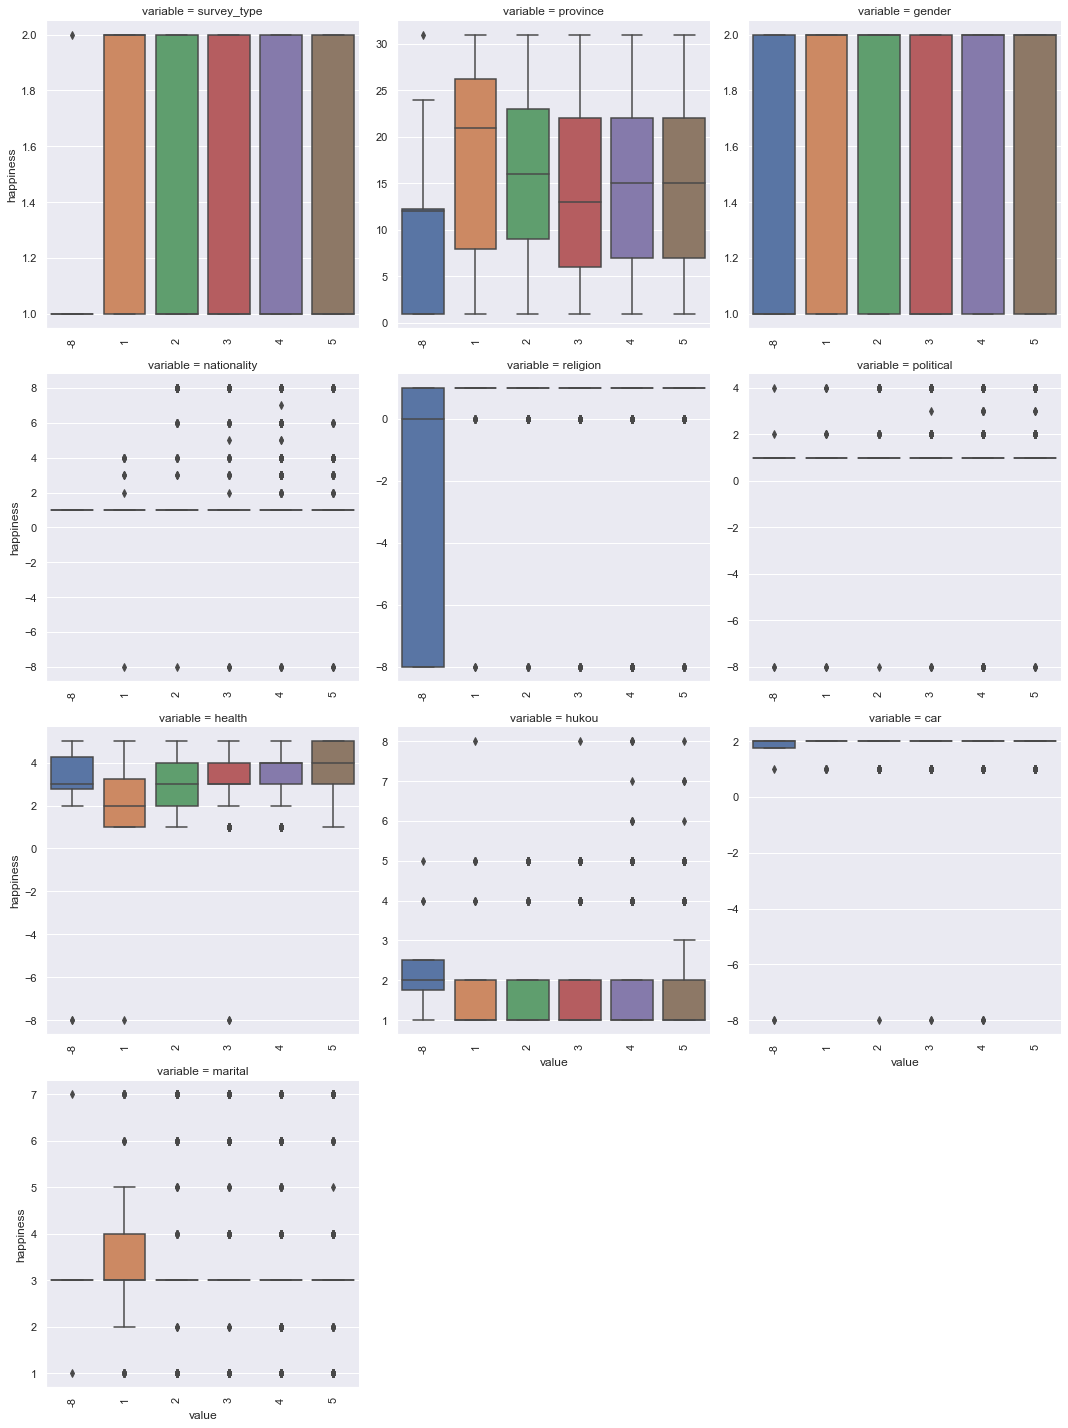

In [194]:
## 2) 类别特征箱形图可视化

categorical_features = ['survey_type',
 'province',
# 'city',
# 'county',
 'gender',
 'nationality',
 'religion',
 'political',
 'health',
 'hukou',
# 'work_exper',
# 'work_status',
# 'work_type',
 'car',
 'marital']

for c in categorical_features:
    train[c] = train[c].astype('category')
    if train[c].isnull().any():
        train[c] = train[c].cat.add_categories(['MISSING'])
        train[c] = train[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=y, y=x)
    x=plt.xticks(rotation=90)

f = pd.melt(train, id_vars=['happiness'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "happiness")

In [200]:
## 3) 类别特征的小提琴图可视化
catg_list = categorical_features
target = 'happiness'
for catg in catg_list :
    print(catg)
    sns.violinplot(x=catg, y=target, data=train)
    plt.show()

    

survey_type


TypeError: Neither the `x` nor `y` variable appears to be numeric.

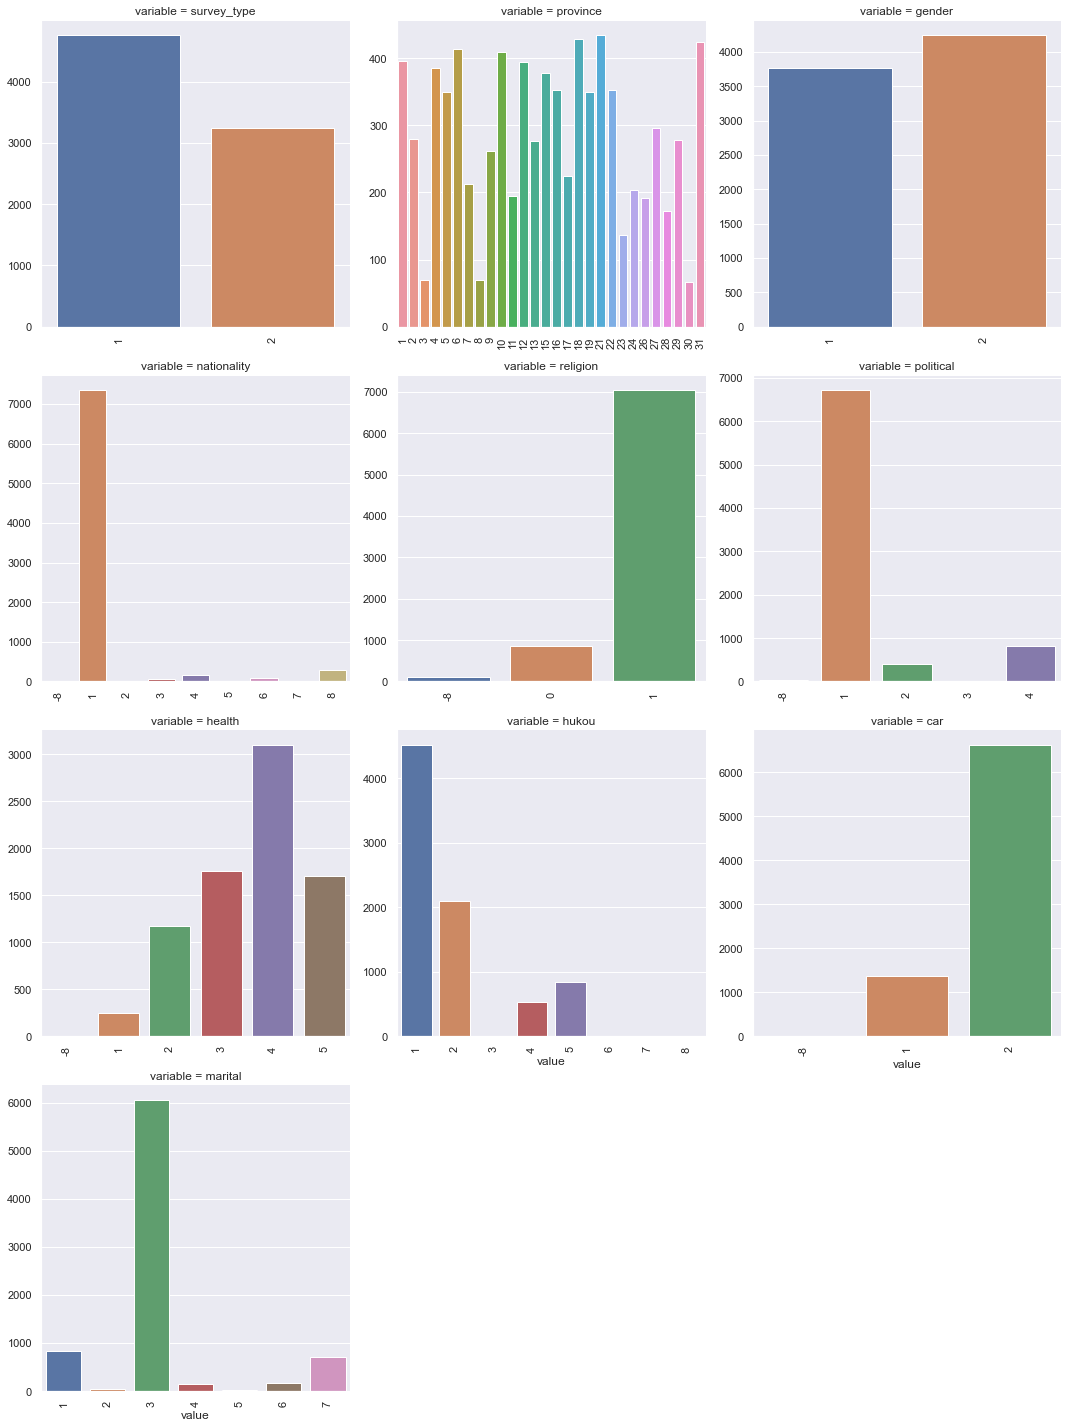

In [203]:
##  5) 类别特征的每个类别频数可视化(count_plot)
def count_plot(x,  **kwargs):
    sns.countplot(x=x)
    x=plt.xticks(rotation=90)

f = pd.melt(train,  value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(count_plot, "value")

In [206]:
import pandas_profiling

In [209]:
pfr = pandas_profiling.ProfileReport(train)
#pfr.to_file("./example.html")

In [214]:
pfr.to_json()

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html